In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir("drive/MyDrive/colab/si_650/HW/")

### 1 Probabilistic Reasoning and Bayes Rule

#### a) Fill in the Table 2 with conditional probabilities using only the information present in the 12 samples.


$P(B=1) = 7/12, P(U=1) = 8/12, P(E=1) = 5/12$

$P(S=1) = 7/12, P(S=1 ∩ B=1) = 5/12, P(S=1 ∩ U=1) = 5/12, P(S=1 ∩ E=1) = 3/12$

$P(S=0) = 5/12, P(S=0 ∩ B=1) = 2/12, P(S=0 ∩ U=1) = 3/12, P(S=0 ∩ E=1) = 2/12$

In [2]:
import pandas as pd

In [7]:
cond_prob = pd.DataFrame({'S':[1, 0], 'P(B = 1|S)':[0.71429, 0.4], 'P(U = 1|S)':[0.71429, 0.6], 'P(E = 1|S)':[0.42857, 0.4], 'prior P(S)':[0.58333, 0.41667]}).set_index('S')
cond_prob

,P(B = 1|S),P(U = 1|S),P(E = 1|S),prior P(S)
S,,,,
1,0.71429,0.71429,0.42857,0.58333
0,0.40000,0.60000,0.40000,0.41667


#### b) With the independence assumption, use the Bayes formula and the calculated conditional probabilities to compute the probabilities that account a with B = 0, U = 1, E = 0 is a spam. That is, compute P(S = 1|B = 0, U = 1, E = 0) and P(S = 0|B = 0, U = 1, E = 0). Would you conclude that account a is a spam? Show your computation.


$P(S = 1|B = 0, U = 1, E = 0) = P(B = 0, U = 1, E = 0|S = 1) * P(S = 1) / P(B = 0, U = 1, E = 0) = ((2/7 * 5/7 * 4/7) * 7/12) / (5/12 * 8/12 * 7/12) ≊ 0.42$

$P(S = 0|B = 0, U = 1, E = 0) = P(B = 0, U = 1, E = 0|S = 0) * P(S = 0) / P(B = 0, U = 1, E = 0) = ((3/5 * 3/5 * 3/5) * 5/12) / (5/12 * 8/12 * 7/12) ≊ 0.78$

I would conclude that account a has a higher probability to not be a spam.

#### c) Now, compute P(S = 1|B = 0, U = 1, E = 0) and P(S = 0|B = 0, U = 1, E = 0) directly from the 12 examples in Table 1, just like what you did in problem A. Do you get the same value as in problem B? Why?

$P(S = 1|B = 0, U = 1, E = 0) = 1$

$P(S = 0|B = 0, U = 1, E = 0) = 0$

Because we only have a small sample of the entire probability space, we don't have enough events that $P(B=0, U=1, E=0)$ occurs, causing the results to be heavily biased towards $S=1$.

#### d) Now, ignore Table 1, and consider any possibilities you can fill in Table 2. Are there any constraints on these values that we must respect when assigning these values? In other words, can we fill in Table 2 with 8 arbitrary values between 0 and 1? If not, are there any constraints on some values that we must follow? Describe your answer.


For prior P(S) probabilities, the probabilities of $P(S = 1)$ and $P(S = 0)$ must add up to 1. Other than this, if the account space is infinite, theoretically speaking we should be able to just fill in arbitrary values between 0 and 1.

#### e) Can you change your conclusion of problem a (i.e., whether account a is a spam) by only changing the value E (i.e., if the account bio has an emoji) in one example of Table 1? Describe your answer.


I believe that if we're only allowed to make changes to one single account, it would not be sufficient to overturn my conclusion. For example, if we remove the emoji of the tenth account, $P(S = 1|B = 0, U = 1, E = 0)$ would become 0.46 and $P(S = 0|B = 0, U = 1, E = 0)$ would equal 0.68. The probability of it being spam increases, but still not enough to justify changing my conclusion.

#### f) Explain why the independence assumption P(B, U, E|S) = P(B|S)P(U|S)P(E|S) does not necessarily hold in reality.

Even though event B, U, and E are independent events by themselves, that does not necessarily mean they are still mutually independent events given event S.

### 2 Text Data Analyses

In [3]:
import spacy

In [4]:
with open("si650-f21-reddit-questions.txt") as f:
  reddit = f.read().split("\n")
with open("si650.f21.wiki-bios.10k.txt") as f:
  wiki = f.read().split("\n")
with open("stoplist.txt") as f:
  stopwords = f.read().split("\n")
nlp = spacy.load("en_core_web_sm")

#### 1. Tokenize the text using SpaCy and compute the frequency of words. Then, plot the frequency distribution of words in each collection after the removal of the stopwords: x-axis – each point is a word, sorted overall by frequency (number of times a word appears in the collection); y-axis – how many times the word occurred. Plot this using a log scale on each axis. Does each plot look like a power-law distribution? Are the two distributions similar or different?


Both of the histograms do seem to follow fairly similar power-law distributions.

In [5]:
from collections import Counter
import seaborn as sns
import numpy as np

In [6]:
reddit_docs = list(nlp.pipe(reddit))  # tokenizing reddit questions one by one

In [7]:
wiki_docs = list(nlp.pipe(wiki))  # tokenizing wiki bios one by one

In [8]:
# looping through docs to get frequency for all words
reddit_words = []
for doc in reddit_docs:
  reddit_words += [token for token in doc if token.is_punct != True]  # remove punctuations
reddit_words_filter = [word for word in reddit_words if word.text not in stopwords]  # remove stopwords

In [9]:
wiki_words = []
for doc in wiki_docs:
  wiki_words += [token for token in doc if token.is_punct != True]
wiki_words_filter = [word for word in wiki_words if word.text not in stopwords]

In [10]:
reddit_freq = Counter([word.text for word in reddit_words_filter])
wiki_freq = Counter([word.text for word in wiki_words_filter])

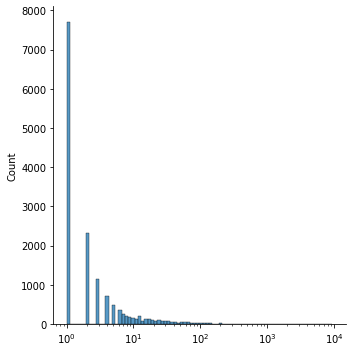

In [11]:
sns.displot(reddit_freq, log_scale=True, kind='hist')

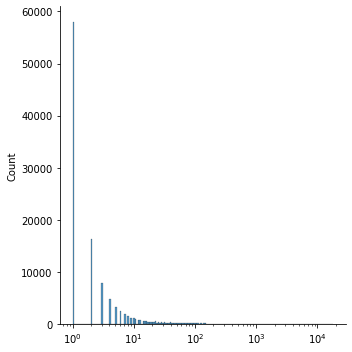

In [12]:
sns.displot(wiki_freq, log_scale=True, kind='hist')

#### 2. Now compare the two collections more rigorously. Report the following properties of each collection, using SpaCy to POS tag. Can you explain these differences based on the nature of the two collections?

##### a) Frequency of stopwords (percentage of the word occurrences that are stopwords.)

Wikipedia biograpies consist of multiple paragraphs and sentences, which may contain many different keywords. On the other hand, Reddit questions often only have one sentence with certain keywords. Therefore, it is sensible that Reddit questions have fewer stopwords on average.

In [13]:
print(f"% of stopwords in reddit questions: {round(len([word.text for word in reddit_words if word.text in stopwords]) / len(reddit_words) * 100, 2)}%")
print(f"% of stopwords in wiki bios: {round(len([word.text for word in wiki_words if word.text in stopwords]) / len(wiki_words) * 100, 2)}%")

% of stopwords in reddit questions: 50.56%
% of stopwords in wiki bios: 35.93%


##### b) Percentage of capital letters


Wikipedia biographies have more paragraphs and sentences, which start with capital letters, it's reasonable for them to have more capital letters than Reddit questions. Also, the amount of names in Wikipedia bios should be significantly higher than that of Reddit.

In [14]:
print(f"% of capitalized words in reddit questions: {round(len([word.text for word in reddit_words if word.text.isupper()]) / len(reddit_words) * 100, 2)}%")
print(f"% of capitalized words in wiki bios: {round(len([word.text for word in wiki_words if word.text.isupper()]) / len(wiki_words) * 100, 2)}%")

% of capitalized words in reddit questions: 1.16%
% of capitalized words in wiki bios: 1.56%


##### c) Average number of characters per word


Wikipedia biographies tend to have a more advanced usage of vocabularies than that of Reddit, so it makes sense that they have longer words on average.

In [15]:
print(f"avg number of characters per word in reddit questions: {round(np.mean(list(map(lambda x: len(x.text), reddit_words))), 2)}")
print(f"avg number of characters per word in wiki bios: {round(np.mean(list(map(lambda x: len(x.text), wiki_words))), 2)}")

avg number of characters per word in reddit questions: 4.19
avg number of characters per word in wiki bios: 4.74


##### d) Percentage of nouns, adjectives, verbs, adverbs, and pronouns

Wikipedia articles are typically written more objectively, so adjectives and adverbs should rarely appear. Also, Wikipedia articles mostly use proper nouns and names instead of pronouns, which explains the low percentage of pronouns. Lastly, once again, because of Wikipedia bios' higher completeness, I'd assume that the percentages of nouns and verbs were driven down by the high percentages of other POS tags (e.g., proper nouns, numbers, prepositions, etc.).

In [16]:
reddit_pos_freq = Counter([word.pos_ for word in reddit_words])

In [17]:
wiki_pos_freq = Counter([word.pos_ for word in wiki_words])

In [18]:
print(f"% of n, adj, v, adv, pron in reddit questions: {round(reddit_pos_freq['NOUN'] / len(reddit_words) * 100, 2)}%, {round(reddit_pos_freq['ADJ'] / len(reddit_words) * 100, 2)}%, {round(reddit_pos_freq['VERB'] / len(reddit_words) * 100, 2)}%, {round(reddit_pos_freq['ADV'] / len(reddit_words) * 100, 2)}%, {round(reddit_pos_freq['PRON'] / len(reddit_words) * 100, 2)}%")
print(f"% of n, adj, v, adv, pron in wiki bios: {round(wiki_pos_freq['NOUN'] / len(wiki_words) * 100, 2)}%, {round(wiki_pos_freq['ADJ'] / len(wiki_words) * 100, 2)}%, {round(wiki_pos_freq['VERB'] / len(wiki_words) * 100, 2)}%, {round(wiki_pos_freq['ADV'] / len(wiki_words) * 100, 2)}%, {round(wiki_pos_freq['PRON'] / len(wiki_words) * 100, 2)}%")

% of n, adj, v, adv, pron in reddit questions: 18.89%, 6.97%, 14.28%, 6.14%, 14.19%
% of n, adj, v, adv, pron in wiki bios: 15.78%, 5.25%, 9.19%, 2.46%, 3.2%


##### e) The top 10 nouns, top 10 verbs, and top 10 adjectives

The top 10 words in Reddit questions all seem to be about people's opinions on certain elements in our daily lives, whereas the top 10 words for Wikipedia bios are descriptions of these people's lives, experiences, and accomplishments.

In [19]:
print("top 10 nouns in reddit questions: " + ', '.join([noun[0] for noun in Counter([word.text for word in list(filter(lambda x: x.pos_ == "NOUN", reddit_words))]).most_common(10)]))
print("top 10 verbs in reddit questions: " + ', '.join([verb[0] for verb in Counter([word.text for word in list(filter(lambda x: x.pos_ == "VERB", reddit_words))]).most_common(10)]))
print("top 10 adjectives in reddit questions: " + ', '.join([adj[0] for adj in Counter([word.text for word in list(filter(lambda x: x.pos_ == "ADJ", reddit_words))]).most_common(10)]))

top 10 nouns in reddit questions: food, love, college, thing, people, People, life, time, reddit, story
top 10 verbs in reddit questions: love, would, ’s, can, loved, think, know, eat, could, make
top 10 adjectives in reddit questions: best, favorite, good, worst, fast, other, first, Serious, most, weirdest


In [20]:
print("top 10 nouns in wiki bios: " + ', '.join([noun[0] for noun in Counter([word.text for word in list(filter(lambda x: x.pos_ == "NOUN", wiki_words))]).most_common(10)]))
print("top 10 verbs in wiki bios: " + ', '.join([verb[0] for verb in Counter([word.text for word in list(filter(lambda x: x.pos_ == "VERB", wiki_words))]).most_common(10)]))
print("top 10 adjectives in wiki bios: " + ', '.join([adj[0] for adj in Counter([word.text for word in list(filter(lambda x: x.pos_ == "ADJ", wiki_words))]).most_common(10)]))

top 10 nouns in wiki bios: career, season, life, years, time, team, year, member, family, club
top 10 verbs in wiki bios: born, played, became, made, won, died, would, served, began, worked
top 10 adjectives in wiki bios: first, Early, second, other, new, former, several, American, early, final


#### 3. We would like to summarize each document with a few words. However, picking the most frequently used words in each document would be a bad idea, since they are more likely to appear in other document as well. Instead, we pick the words with the highest TF-IDF weights in each document. In this problem, term frequency (TF) and inverse document frequency (IDF) are defined as: $T F(t, d) = log(c(t, d) + 1)IDF(t) = 1 + log(N/k)$. c(t, d) is the frequency count of term t in doc d, N is the total number of documents in the collection, and k is the document frequency of term t in the collection. For each of the first 10 documents in the Wikipedia biographies collection, print out the 5 words that have the highest TF-IDF weights. Write whether you think these could be a good summary of the documents.


For each person in the biographies, we can all roughly discern some aspects of their lives. However, this is hard to do at first glance, and despite removing stopwords and punctuation, there are still some untrimmed symbols and words. This could be due to spaCy's tokenization exception rules, but nevertheless there is obviously some room for improvement.

In [21]:
def get_df(docs):
  """
  calculates df for each term in given set of documents
  """
  df = {}  # a dictionary of sets
  for i, doc in enumerate(docs):
    for token in doc.split(' '):  # loop through list of words in doc
      if token in df:
        df[token].add(i)  # if token in doc -> add doc index to set
      else:
        df[token] = {i}  # create a set of docs with doc indexes
  return df

In [22]:
def tfidf_top(docs, n_words=5):
  """
  returns top 5 relevant words of each document based on tf-idf for given set of documents
  """
  df = get_df(docs)
  for i, doc in enumerate(docs):
    tfidf = {}
    words = doc.split(" ")
    words_ct = Counter(words)
    for word in set(words):
      tfidf[word] = np.log(1 + words_ct[word]) * (1 + np.log(len(docs) / len(df[word])))  # use natural logarithm for tfidf
    
    top_words = sorted(tfidf, key=tfidf.get, reverse=True)[:n_words]
    print(f"Doc{i + 1}. {', '.join(top_words)}")

In [23]:
wiki_docs_filter = []  # filter out stopwords and punctuation before calculating tfidf
for doc in wiki_docs:
  new_doc = ' '.join([word.text for word in doc if word.text not in stopwords and word.is_punct != True])
  wiki_docs_filter.append(new_doc)

In [24]:
tfidf_top(wiki_docs_filter[:10])

Doc1. drawing, caricatures, Turin, 1820–1876, Francesco
Doc2. 1936, Deacon, Winter, ice, hockey
Doc3. windsurfer, Hugh, Windglider, event, 1984
Doc4. Ershad, =, Jatiya, Awami, Party
Doc5. May, 13, m, cyclist, I
Doc6. Historian, Husayn, 1918, Middle, subjects
Doc7. Notre, football, Dame, played, American
Doc8. Reed, photographs, studio, Northern, work
Doc9. rugby, code, union, Welsh, 1976
Doc10. Evrenos, Giannitsa, restoration, Greece, Tomb


#### 4. As discussed in the class, TF-IDF is a common way to weight the terms in each document. It can also be easily calculated from the inverted index (covered in Week 3), since TF can be obtained from the postings and IDF can be summarized as a dictionary. Could you think of another weighting that cannot be calculated directly from inverted index? What is the advantage of such a weighting?

Lee et al. compared three different kinds of weighting measures -- local weighting function, idf, and entropy global weighting. Among the three, entropy global weighting had the best performance and had results closest to human judgement. This could be because entropy collects more information from the terms and helps reduce the subjectivity of determining weights.

Reference: Lee, M. (2005). *An Empirical Evaluation of Models of Text Document Similarity* (http://www.socsci.uci.edu/~mdlee/lee_pincombe_welsh_document.PDF)

### 3 Document Ranking and Evaluation

#### 1. Compute the precision, recall, F1 score, and the mean average precision (MAP).


In [25]:
docs = ["++", "-", "+", "++", "-", "+", "-", "++", "+", "-", "-", "+", "++", "-", "-", "+", "+", "++", "+", "-"]
def precision(docs):
  return len(list(filter(lambda x: x != "-", docs))) / len(docs)  # filter out true positives

def recall(docs, rels=20):
  return len(list(filter(lambda x: x != "-", docs))) / rels

def F1(docs):
  return 2 * (precision(docs) * recall(docs)) / (precision(docs) + recall(docs))

def MAP(docs, rels=20):
  rels_ct = 0
  rels_precision = []
  for i, doc in enumerate(docs):
    if doc != "-":  # if relevant
      rels_ct += 1  # number of relevant docs in query += 1
      rels_precision.append(rels_ct / (i + 1))
    else:
      rels_precision.append(0)  # 0 represents irrelevant docs
  return round(sum(rels_precision) / rels, 2)

In [26]:
print(f"Precision: {precision(docs)}")
print(f"Recall: {recall(docs)}")
print(f"F1 Score: {F1(docs)}")
print(f"MAP: {MAP(docs)}")

Precision: 0.6
Recall: 0.6
F1 Score: 0.6
MAP: 0.4


#### 2. Consider ++ as the corresponding document being highly relevant (ri = 2), while + indicates somewhat relevant (ri = 1), - being non-relevant (ri = 0). For the nine rest relevant documents, treat them as somewhat relevant (ri = 1) Calculate the Cumulative Gain (CG) at rank 10, Discounted Cumulative Gain (DCG) at rank 10, and Normalized Cumulative Gain (NDCG), at rank 10. Use log2 for the discounting function. Note You may find the definition of DCG in Wikipedia is different from the definition in our lecture. Please use the one in our lecture to calculate DCG and NDCG.

In [27]:
def cg_rank(docs, rank=10, kind='CG', raw=True):  # raw parameter placed for function reuse in Q4
  docs_r = []
  if raw:
    for i, doc in enumerate(docs):  # replace symbols with relevance score
      if doc == "++":
        docs_r.append(2)
      elif doc == "+":
        docs_r.append(1)
      else:
        docs_r.append(0)
  else:
    docs_r = docs

  if kind == 'CG':
    return sum(docs_r[:rank])

  # if kind == 'DCG'
  docs_r_d = []
  for i, doc in enumerate(docs_r):
    docs_r_d.append(docs_r[i] / np.log2(i + 2))  # np.log2(1) will face zero division -> add 1 more to avoid 
  if kind == 'DCG':
    return sum(docs_r_d[:rank])

In [28]:
idcg = sum(np.array([2] * 10) / np.array([np.log2(i + 2) for i in range(10)]))

In [29]:
print(f"CG: {cg_rank(docs, kind='CG')}")
print(f"DCG: {round(cg_rank(docs, kind='DCG'), 2)}")
print(f"NDCG: {round(cg_rank(docs, kind='DCG') / idcg, 2)}")

CG: 9
DCG: 4.65
NDCG: 0.51


### 4 Simple Search

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

#### 1. Write a function that uses CountVectorizer to convert the Reddit questions corpus to vectors. Write a function that given a new query, will convert its text to a vector (using the same vectorizer), estimate the cosine similarity between the query and each document (i.e., each Reddit question) and return the 10 most similar.


In [31]:
reddit_docs_text = [doc.text for doc in reddit_docs]  # convert reddit_docs from spacy.doc to text

In [32]:
def corpus_to_vector(corpus):
  vectorizer = CountVectorizer()
  vector = vectorizer.fit_transform(corpus)
  return vector.toarray(), vectorizer

In [33]:
def cosine_similarity(v1, v2):
  return np.dot(v1, v2) / (np.sqrt(np.dot(v1, v1)) * np.sqrt(np.dot(v2, v2)))

np.seterr(divide='ignore', invalid='ignore')  # to turn off error for zero division in some cases

{'divide': 'warn', 'invalid': 'warn', 'over': 'warn', 'under': 'ignore'}

In [34]:
def query_similarity(docs, query, n_docs=10):
  docs_vector = corpus_to_vector(docs)
  query_vector = docs_vector[1].transform([query]).toarray()[0]  # vectorizer.transform only takes iterables as argument -> put str into list
  scores = {}

  for i, doc in enumerate(docs_vector[0]):
    score = cosine_similarity(doc, query_vector)
    scores[docs[i]] = score

  similar_docs = sorted(scores, key=scores.get, reverse=True)
  for i, doc in enumerate(similar_docs[:n_docs]):
    print(f"{i + 1}. {doc}")
  return similar_docs[:n_docs]

#### 2. Using your method, a) run the following queries and show the questions they return: (1) programming, (2) pets, (3) college, (4) love, and (5) food; b) Score each retrieved question for relevance using a three point scale as in Problem 3 (very relevant, somewhat relevant, not relevant); c) compute NDCG for each query and report it.


I decided to use two criteria to determine the results' relevancy. First, does the question fit the context? That is, what kind of results do people usually want to find when searching with a "single" word? Questions that are too specific probably is not what we are looking for. Next up, the POS of the term. Most single word search terms are nouns, so if the query term appears in the question with a POS other than noun, chances are that it's less relevant.

In [35]:
q_programming = query_similarity(reddit_docs_text, "programming")

1. How to start programming?
2. Java SE programming training
3. How to start programming? What are important things i have to learn in programming?
4. Where can i find programming podcast?
5. Which language programming do you prefer?
6. Programmers, what do you like about programming?
7. What is your best quotes about programming?
8. What is your favorite programming language and why?
9. What programming language do you study at school?
10. What decisions/reactions are hardcoded in your programming?


In [36]:
# "programming" -> probably someone who's trying to know more about programming or learn programming
# 1, 3, 6 -> very relevant
# 2, 4, 7, 8, 9 -> somewhat relevant
# 10 -> not relevant
q_programming_scores = [2, 1, 2, 1, 2, 2, 1, 2, 2, 0]
print(f"programming NDCG: {round(cg_rank(q_programming_scores, kind='DCG', raw=False) / idcg, 2)}")  # idcg same as idcg in Q3

programming NDCG: 0.78


In [37]:
q_pets = query_similarity(reddit_docs_text, "pets")

1. What's your pets name?
2. Whats your pets name?
3. What’s your pets name??
4. "People with pets on Reddit, What was the most Weirdest thing your pets did?"
5. If there was a dating app for pets, what would your pets ‘Tell Us About Yourself’ be?
6. redditors who have inadvertently gotten their pets high on some drug, what was your pets' reaction?
7. What are the cleanest pets?
8. Why do we love pets?
9. What is your pets name?
10. Do your pets have friends?


In [38]:
# "pets" -> probably someone who's trying to know more about pets or adopt a pet
# 8 -> very relevant
# 1, 2, 3, 4, 5, 7, 9, 10 -> somewhat relevant
# 6 -> not relevant
q_pets_scores = [1, 1, 1, 1, 1, 0, 1, 2, 1, 1]
print(f"pets NDCG: {round(cg_rank(q_pets_scores, kind='DCG', raw=False) / idcg, 2)}")

pets NDCG: 0.5


In [39]:
q_college = query_similarity(reddit_docs_text, "college")

1. Fellow broke college students, how did you survive college?
2. Current college students or college grads: What is (was) your favorite thing about going to college and being on campus?
3. Post college decisions
4. College dropouts what finally made you give up on college?
5. Is college a scam?
6. College dropouts what finally made you give up on college
7. Choosing a college computer
8. College students/alumni, what actually helped you get through college?
9. Paying for college
10. College students, how many hours a day do you spend at college?


In [40]:
# "college" -> probably someone who's trying to know more about college life or decide if college is a good idea
# 2, 5, 8, 10 -> very relevant
# 1, 3, 4, 6, 9 -> somewhat relevant
# 7 -> not relevant
q_college_scores = [1, 2, 1, 1, 2, 1, 0, 2, 1, 2]
print(f"college NDCG: {round(cg_rank(q_college_scores, kind='DCG', raw=False) / idcg, 2)}")

college NDCG: 0.64


In [41]:
q_love = query_similarity(reddit_docs_text, "love")

1. Love
2. love
3. love?
4. Is online love real love?
5. Romantic love or mature love?
6. Why love?
7. I love reddit.
8. Fuck love
9. True love
10. I love this


In [42]:
# "love" -> probably someone who's trying to know more about what love is and others' opinions on love
# 1, 2, 3, 6, 8, 9 -> very relevant
# 4, 5 -> somewhat relevant
# 7, 10 -> not relevant
q_love_scores = [2, 2, 2, 1, 1, 2, 0, 2, 2, 0]
print(f"love NDCG: {round(cg_rank(q_love_scores, kind='DCG', raw=False) / idcg, 2)}")

love NDCG: 0.77


In [43]:
q_food = query_similarity(reddit_docs_text, "food")

1. Which food delivery is better Grab Food or Uber Food in Thailand?
2. Send food
3. Voodoo food
4. Forever food
5. food advice
6. People in food service or food prep, have you ever spit in someone’s food?
7. What food gave you the worst food poisoning?
8. What are your favorite fast food/junk food items?
9. Fast food, or food-related job employees of Reddit, what is/was the weirdest food combination a customer has ordered before?
10. Weird food combinations?


In [44]:
# "food" -> probably someone who's trying to find food or recommendations for food
# 2, 5 -> very relevant
# 3, 4, 8, 10 -> somewhat relevant
# 1, 6, 7, 9 -> not relevant
q_food_scores = [0, 2, 1, 1, 2, 0, 0, 1, 0, 1]
print(f"food NDCG: {round(cg_rank(q_food_scores, kind='DCG', raw=False) / idcg, 2)}")

food NDCG: 0.39


#### 3. In a 2-3 sentences, describe how well you think your IR system is doing. What kids of queries do you think it would work well on? What kinds of queries do you think it will perform poorly on? (Feel free to describe example queries if you want to test things!)

Technically, the IR system does what it is supposed to do on paper, that is, return results that contain the query. For specific search terms, such as "programming", the results are actually pretty accurate. However, due to the lack of consideration for POS and syntax, the system does poorly to infer the intent of the user. This would be a big problem for words that have multiple meanings. For example, if I wanted to look for a "play", the search results are extremely mixed and none are about plays.

In [55]:
q_play = query_similarity(reddit_docs_text, "play")

1. What are games that you can ONLY play in the classroom, that you'd love to play outside of the classroom or wish you could play again?
2. What’s the best drinking game to play?
3. Who do you play Mario Kart as?
4. What pranks do you play on strangers?
5. Music lovers of Reddit, if you were to play just one song for the rest of your life, what song would you play and why?
6. If you can only play one song on repeat for some sort of occasion that you know everyone would love, what would you play?
7. Does anybody want to share his minecraft login with me, i really want to play with my friends but normally i play on xbox and i don't have a lot of money?
8. What made up games did you play as a kid?
9. Which video game is the most relaxing to play?
10. I'm planning on learning how to play a guitar, any tips?


#### 4. Re-run your CountVectorizer code with 500, 1K, 5K, and all 10K questions and for each plot how many terms appear in the vocabulary field for the vectorizer. In general, we recommend using Seaborn for all plotting. Write 2-3 on why you think this approach will or won’t scale as we get more documents and justify you answer.

As the number of questions increases, the number of unique terms actually increases at a much slower rate, so it does seem to be a viable approach for cases with a small number of documents. However, if we really want to scale up the search engine, this approach is not it. It wastes a whole lot of memory and computing power, and once the number of documents reaches the millions, the sheer size of the vectors could prove to be too much for laptops to handle.

In [83]:
from random import sample

In [59]:
reddit_500 = corpus_to_vector(sample(reddit_docs_text, 500))
reddit_1k = corpus_to_vector(sample(reddit_docs_text, 1000))
reddit_5k = corpus_to_vector(sample(reddit_docs_text, 5000))
reddit_10k = corpus_to_vector(sample(reddit_docs_text, 10000))

In [72]:
reddit_500_terms = reddit_500[0].shape[1]
reddit_1k_terms = reddit_1k[0].shape[1]
reddit_5k_terms = reddit_5k[0].shape[1]
reddit_10k_terms = reddit_10k[0].shape[1]

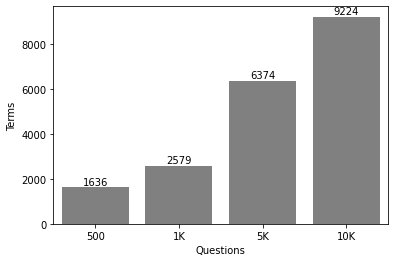

In [91]:
terms_df = pd.DataFrame({'Questions': ['500', '1K', '5K', '10K'], 'Terms': [reddit_500_terms, reddit_1k_terms, reddit_5k_terms, reddit_10k_terms]})

plot = sns.barplot(x='Questions', y='Terms', data=terms_df, color='gray')
for i, r in terms_df.iterrows():
    plot.text(r.name, r.Terms + 100, r.Terms, color='black', ha="center")